In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from auxiliary import load_pickle
import pandas as pd
import numpy as np
%matplotlib inline

sns.set_theme()

In [13]:
PATH='./results/TestSuite-06_15_2021-17_15_35_non_iid_first_16'

In [14]:
data = load_pickle(PATH)

In [15]:
def get_mean_test_acc_per_epoch(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(node_dict['test_accuracies'])
    transpose = list(zip(*top_acc_list))
    return [np.mean(node) for node in transpose]

In [20]:
def graph_mean_epochs(results, setup="not_private", n_subplots = 3):
    
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    
    f, ax = plt.subplots(1, n_subplots, sharex=True, sharey=True, figsize=(13,5))
        
    for idx, run in enumerate(results):
        if setup == "not_private":
            if not run['add_privacy_list']:
                ax[idx%3].plot(run['epoch_list'], get_mean_test_acc_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx%3].tick_params(axis='x', labelsize=15)
                ax[idx%3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)
        if setup == "private":
            if run['add_privacy_list']:
                ax[idx%3].plot(run['epoch_list'], get_mean_test_acc_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx%3].tick_params(axis='x', labelsize=15)
                ax[idx%3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)
        
    for i in range(n_subplots):
        ax[i].set_xlabel("Epochs", fontsize=18)
        ax[i].set_ylabel("Mean Test Accuracy", fontsize=18)
        ax[i].set_xlim(0, 50)
        ax[i].set_ylim(0,1)
        
    ax[2].legend()

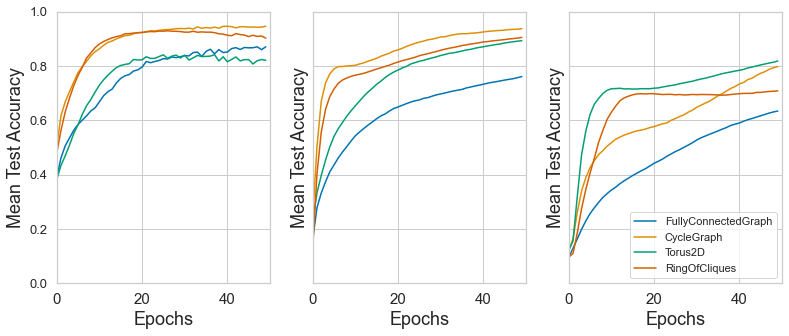

In [21]:
graph_mean_epochs(data)

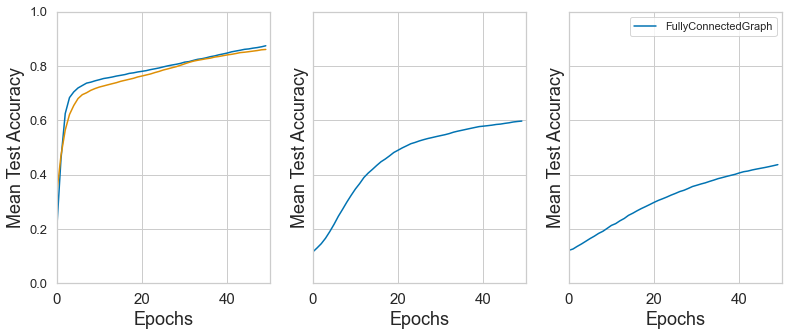

In [22]:
graph_mean_epochs(data, "private")

In [19]:
def get_top1_accuracy(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(max(node_dict['test_accuracies']))

    return top_acc_list, sum(top_acc_list)/len(top_acc_list)

In [ ]:
def graph_top1_epochs(results, setup="uniform_iid_non_private", n_subplots = 3):
    
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    
    f, ax = plt.subplots(1, n_subplots, sharex=True, sharey=True, figsize=(13,5))
        
    for idx, run in enumerate(results):
        if setup == "uniform_iid_non_private":
            if not run['add_privacy_list']:
                ax[idx%3].plot(run['epoch_list'], get_top1_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx%3].tick_params(axis='x', labelsize=15)
                ax[idx%3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)
        if setup == "uniform_iid_private":
            if run['add_privacy_list']:
                ax[idx%3].plot(run['epoch_list'], get_top1_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx%3].tick_params(axis='x', labelsize=15)
                ax[idx%3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)
                
        
    for i in range(n_subplots):
        ax[i].set_xlabel("Epochs", fontsize=18)
        ax[i].set_ylabel("Test Accuracy", fontsize=18)
        ax[i].set_xlim(0, 20)
        
    ax[2].legend()

In [ ]:
fig = graph_top1_epochs(data)
fig
#plt.savefig("./plots/topology_testrun_iid_uniform_data_non_private.pdf")

In [ ]:
graph_top1_epochs(data, "uniform_iid_private")
#plt.savefig("./plots/topology_testrun_iid_uniform_data_private.pdf")

In [ ]:
def graph_top1_bytes(results):
    f, ax = plt.subplots(1, 1)
    for run in results:
        ax = sns.lineplot(x = run['node_0']['sent_bytes'],y = get_top1_per_epoch(run), label=f"{run['nr_nodes']} Nodes")
    ax.legend()
    plt.xlabel('Bytes')
    plt.ylabel('Accuracy')

In [ ]:
graph_top1_bytes(data)